# Data Wrangling Twetter Page

## Introduction

In this project the goal is to perform the three stages of data wrangling which are:

#### *Gathering*

#### *Assessing*

#### *Cleaning*

## Data Gathering

In this section we are going to gathering the data from different sources. The first one being manually downloading the Twitter archive file available for download then load it in our notebook.

Second is downloading the image predictions file from the link: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv 

Lastly getting the data from the JSON file.


________________________

First we import all the libraries we need for this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json

#### 1- Twitter Archive File

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.sort_values('timestamp')
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


#### 2- Image Prediction

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [4]:
image_prediction.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


#### 3- JSON Tweet

In [5]:
consumer_key = 'MY CONSUMER KEY'
consumer_secret = 'MY CONSUMER SECRET'
access_token = 'MY ACCESS TOKEN'
access_secret = 'MY ACCESS SECRET'

In [61]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [6]:
with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

In [7]:
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [8]:
tweet_json = pd.DataFrame()

In [9]:
tweet_json['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_json['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_json['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

In [10]:
tweet_json.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


## Data Assesment

In this section we're going to perform assesment on the previous tables to find out the quality and tideness issues in the dataset.


#### 1- Twitter Archive

In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_archive.duplicated().sum()

0

In [13]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [14]:
a = twitter_archive.tweet_id.count()
b = twitter_archive.retweeted_status_id.count()
c = twitter_archive.retweeted_status_user_id.count()
d = twitter_archive.retweeted_status_timestamp.count()
e = twitter_archive.expanded_urls.count()
print('tweet_id:', a)
print('retweeted_stat_id:', b)
print('retweeted_stat_user:', c)
print('retweeted_stat_time:', d)
print('expanded_urls:', e)

tweet_id: 2356
retweeted_stat_id: 181
retweeted_stat_user: 181
retweeted_stat_time: 181
expanded_urls: 2297


The null values in retweeted_status_id , retweeted_status_user_id, retweeted_status_timestamp are 2175/2356 which leaves only 181 of its value that is not null.

In [15]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
print(twitter_archive['text'][1120])
print(twitter_archive['text'][1634]) 
print(twitter_archive['text'][313]) 
print(twitter_archive['text'][189]) 
print(twitter_archive['text'][1779]) 

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq


____________________________________
We notice some tweets have more than one dog and the others dont have pics.

In [17]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [18]:
print(twitter_archive['text'][784])
print(twitter_archive['text'][1068])
print(twitter_archive['text'][1662]) 
print(twitter_archive['text'][2335])
print(twitter_archive['text'][1663])
print(twitter_archive['text'][342])
print(twitter_archive['text'][516])

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
@docmisterio account started on 11/15/15
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


We notice some errors in ratings and some retweets which we do not need, also some of them are missing ratings that needs to be deleted.

#### 2- Image Prediction

In [19]:
image_prediction.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [20]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_prediction.duplicated().sum()

0

In [22]:
image_prediction.jpg_url.duplicated().sum()

66

In [23]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [24]:
image_prediction.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [25]:
image_prediction.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [26]:
image_prediction.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

#### 3-JSON Tweet

In [27]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [28]:
tweet_json.head(6)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562


In [29]:
tweet_json.tail(6)

,id,retweet_count,favorite_count
2348,666050758794694657,60,136
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [30]:
tweet_json.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


_______________

#### Now we look at the Quality and Tidiness issues that we gathered.

### Quality

In twitter archive:

1-delete the columns that has null values which wont be needed(the retweets)

2-Numerators should be fixed with dicimal values

3-Correcting Denominators over 10 rating

4-Fixing the timestamp into date seperated into day, month, year

5-Fix doggo, floofer, pupper and puppo columns into better understandable column

In Image prediction:

1-Create a column for confidence level and dog type 

2-delete the unnacesarry columns

3-Drop the duplicated values in jpg_url

### Tidiness

1-Merging the twitter archive with image prediction

2-Merging json tweet with the merged table

## Cleaning The Data

In this section we'll define the issue, code it, then test it. 

first we copy the files.

In [31]:
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

#### 1-delete the columns that has null values which wont be needed(the retweets)

In [32]:
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

In [33]:
print(list(twitter_archive_clean))

twitter_archive_clean = twitter_archive_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


#### TEST

In [34]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [35]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(7)
memory usage: 186.9+ KB


#### 2-Numerators should be fixed with dicimal values

In [36]:
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

#### TEST

In [37]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

D:\anaconda\lib\site-packages\ipykernel\__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


In [38]:
twitter_archive_clean.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None


#### 3-Correcting Denominators over 10 rating

In [39]:
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

#tweets with no rating//delete
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 832088576586297345]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 810984652412424192]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 682808988178739200]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 835246439529840640]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 686035780142297088]


In [40]:
twitter_archive_clean['rating'] = 10 * twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'].astype(float)

#### TEST

In [41]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
1634,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0
1635,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0


In [42]:
twitter_archive_clean.head(4)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None,13.0
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None,13.0
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None,12.0
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None,13.0


#### 4-Fix doggo, floofer, pupper and puppo columns into better understandable column

In [43]:
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id',                                          
                                                                'timestamp',
                                                                'text',
                                                                'rating_numerator',
                                                                'rating_denominator',
                                                                'name'],
                               var_name='dogs', value_name='dogs_stage')

In [44]:
twitter_archive_clean = twitter_archive_clean.drop('dogs', 1)

In [46]:
twitter_archive_clean.drop_duplicates(inplace=True)

#### TEST

In [48]:
twitter_archive_clean.duplicated().sum()

0

In [49]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4696 entries, 0 to 10849
Data columns (total 7 columns):
tweet_id              4696 non-null int64
timestamp             4696 non-null object
text                  4696 non-null object
rating_numerator      4696 non-null float64
rating_denominator    4696 non-null float64
name                  4696 non-null object
dogs_stage            4696 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 293.5+ KB


#### 5-Fixing the timestamp into date seperated into day, month, year

In [50]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day

In [51]:
twitter_archive_clean = twitter_archive_clean.drop('timestamp', 1)

#dropping the timestamp

#### TEST

In [52]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4696 entries, 0 to 10849
Data columns (total 9 columns):
tweet_id              4696 non-null int64
text                  4696 non-null object
rating_numerator      4696 non-null float64
rating_denominator    4696 non-null float64
name                  4696 non-null object
dogs_stage            4696 non-null object
year                  4696 non-null int64
month                 4696 non-null int64
day                   4696 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 366.9+ KB


#### 6-Create a column for confidence level and dog type

In [53]:
dog_type = []
confidence_list = []

def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_type.append(image_prediction_clean['p1'])
        confidence_list.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_type.append(image_prediction_clean['p2'])
        confidence_list.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_type.append(image_prediction_clean['p3'])
        confidence_list.append(image_prediction_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

image_prediction_clean.apply(image, axis=1)

image_prediction_clean['dog_type'] = dog_type
image_prediction_clean['confidence_list'] = confidence_list

In [54]:
#drop rows that has prediction_list 'error'
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_type'] != 'Error']

#### TEST

In [55]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id           1751 non-null int64
jpg_url            1751 non-null object
img_num            1751 non-null int64
p1                 1751 non-null object
p1_conf            1751 non-null float64
p1_dog             1751 non-null bool
p2                 1751 non-null object
p2_conf            1751 non-null float64
p2_dog             1751 non-null bool
p3                 1751 non-null object
p3_conf            1751 non-null float64
p3_dog             1751 non-null bool
dog_type           1751 non-null object
confidence_list    1751 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 169.3+ KB


#### 7-delete the unnacesarry columns

In [56]:
image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1','p1_conf', 'p1_dog','p2', 'p2_conf', 'p2_dog', 'p3',
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

#### TEST

In [57]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id           1751 non-null int64
jpg_url            1751 non-null object
dog_type           1751 non-null object
confidence_list    1751 non-null object
dtypes: int64(1), object(3)
memory usage: 68.4+ KB


#### 8-Drop the duplicated values in jpg_url

In [58]:
image_prediction_clean.drop_duplicates('jpg_url', inplace=True)

#### TEST

In [59]:
image_prediction_clean['jpg_url'].duplicated().sum()

0

### Tidiness

1-merging twitter archive with image prediction

In [60]:
twitter_df = pd.merge(twitter_archive_clean, 
                      image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
twitter_df = twitter_df[twitter_df['jpg_url'].notnull()]

#### TEST

In [61]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3640 entries, 1 to 4695
Data columns (total 12 columns):
tweet_id              3640 non-null int64
text                  3640 non-null object
rating_numerator      3640 non-null float64
rating_denominator    3640 non-null float64
name                  3640 non-null object
dogs_stage            3640 non-null object
year                  3640 non-null int64
month                 3640 non-null int64
day                   3640 non-null int64
jpg_url               3640 non-null object
dog_type              3640 non-null object
confidence_list       3640 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 369.7+ KB


In [62]:
twitter_df.head(3)

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,jpg_url,dog_type,confidence_list
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,2017,8,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,2017,7,31,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,2017,7,30,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086


#### 2-Merging tweet_json with the merged table to form a full table

Now we merge tweet_json to the twitter_df

In [63]:
twitter_df1 = pd.merge(left=twitter_df, right=tweet_json_clean, left_on='tweet_id', right_on='id', how='inner')

In [64]:
twitter_df1 = twitter_df1.drop('id', axis=1)

In [65]:
twitter_df1.head(3)

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,jpg_url,dog_type,confidence_list,retweet_count,favorite_count
0,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,2017,8,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,13,2017,8,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,2017,7,31,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461


### Store the clean DataFrame in a CSV file

In [66]:
twitter_df1.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

### Analysis & Visualization

In [67]:
twitter_df1['dog_type'].value_counts()

golden_retriever                  352
Labrador_retriever                236
Pembroke                          203
Chihuahua                         191
pug                               135
toy_poodle                        110
chow                               99
Pomeranian                         95
Samoyed                            90
malamute                           69
French_bulldog                     66
cocker_spaniel                     65
Chesapeake_Bay_retriever           65
miniature_pinscher                 53
Eskimo_dog                         50
German_shepherd                    49
Staffordshire_bullterrier          45
Cardigan                           44
Siberian_husky                     43
Shih-Tzu                           42
Lakeland_terrier                   42
beagle                             41
Shetland_sheepdog                  41
Maltese_dog                        40
Rottweiler                         40
kuvasz                             39
Italian_grey

We notice that the most common breed is golden_retriever(counted 352) and the least are(counted 2 each):

1.Scotch_terrier
2.EntleBucher 
3.Bouvier_des_Flandres               
4.Irish_wolfhound                   
5.silky_terrier                      
6.clumber                            
7.standard_schnauzer                  
8.Japanese_spaniel

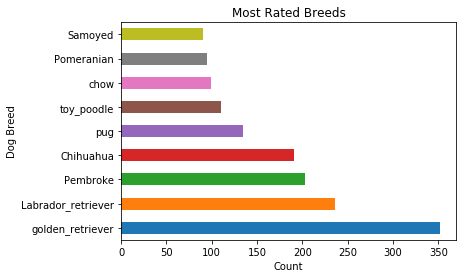

In [74]:
df_dog_type = twitter_df1.groupby('dog_type').filter(lambda x: len(x) >= 90)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Most Rated Breeds')
plt.xlabel('Count')
plt.ylabel('Dog Breed')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

Lets take a look at the ratings for the breeds

In [69]:
df_dog_type_count = twitter_df1.groupby('dog_type').count()
df_dog_type_count

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,jpg_url,confidence_list,retweet_count,favorite_count
dog_type,,,,,,,,,,,,,
Afghan_hound,6,6,6,6,6,6,6,6,6,6,6,6,6
Airedale,25,25,25,25,25,25,25,25,25,25,25,25,25
American_Staffordshire_terrier,35,35,35,35,35,35,35,35,35,35,35,35,35
Appenzeller,4,4,4,4,4,4,4,4,4,4,4,4,4
Australian_terrier,4,4,4,4,4,4,4,4,4,4,4,4,4
Bedlington_terrier,14,14,14,14,14,14,14,14,14,14,14,14,14
Bernese_mountain_dog,24,24,24,24,24,24,24,24,24,24,24,24,24
Blenheim_spaniel,22,22,22,22,22,22,22,22,22,22,22,22,22
Border_collie,28,28,28,28,28,28,28,28,28,28,28,28,28


Lets check out the mean for the breeds

In [70]:
df_dog_type_mean = twitter_df1.groupby('dog_type').mean()

In [71]:
df_dog_type_mean.head()

,tweet_id,rating_numerator,rating_denominator,year,month,day,retweet_count,favorite_count
dog_type,,,,,,,,
Afghan_hound,8.041621e+17,9.666667,10.0,2016.333333,7.666667,11.000000,5976.000000,17326.666667
Airedale,7.199620e+17,9.840000,10.0,2015.600000,8.680000,16.120000,1407.520000,5354.160000
American_Staffordshire_terrier,7.617087e+17,10.428571,10.0,2016.200000,5.285714,14.828571,2325.771429,9271.942857
Appenzeller,7.939334e+17,11.000000,10.0,2016.500000,4.500000,18.500000,1458.000000,7317.500000
Australian_terrier,7.785921e+17,11.500000,10.0,2016.500000,3.500000,7.000000,3078.500000,11127.500000


In [72]:
df_dog_type_sortedn = df_dog_type_mean['rating_numerator'].sort_values()

df_dog_type_sortedn

dog_type
Japanese_spaniel                5.000000
Scotch_terrier                  9.000000
Walker_hound                    9.000000
Tibetan_terrier                 9.250000
dalmatian                       9.275862
Boston_bull                     9.480000
Welsh_springer_spaniel          9.500000
miniature_schnauzer             9.600000
Newfoundland                    9.666667
Afghan_hound                    9.666667
redbone                         9.692308
Maltese_dog                     9.725000
Norwich_terrier                 9.727273
Scottish_deerhound              9.750000
Dandie_Dinmont                  9.800000
Airedale                        9.840000
Saint_Bernard                   9.857143
Mexican_hairless                9.866667
English_setter                  9.882353
miniature_poodle                9.882353
Rhodesian_ridgeback             9.888889
Irish_terrier                  10.000000
groenendael                    10.000000
Ibizan_hound                   10.000000
Brabanc

In [73]:
df_dog_type_sortedd = df_dog_type_mean['rating_denominator'].sort_values()

df_dog_type_sortedd

dog_type
Afghan_hound                   10.000000
cairn                          10.000000
bull_mastiff                   10.000000
briard                         10.000000
boxer                          10.000000
bluetick                       10.000000
bloodhound                     10.000000
black-and-tan_coonhound        10.000000
beagle                         10.000000
basset                         10.000000
basenji                        10.000000
Yorkshire_terrier              10.000000
Welsh_springer_spaniel         10.000000
Weimaraner                     10.000000
Walker_hound                   10.000000
Tibetan_terrier                10.000000
Tibetan_mastiff                10.000000
Sussex_spaniel                 10.000000
Staffordshire_bullterrier      10.000000
Siberian_husky                 10.000000
Shih-Tzu                       10.000000
Shetland_sheepdog              10.000000
Scottish_deerhound             10.000000
whippet                        10.000000
clumber

We notice that the most common breeds dont mean higher rating as we see from the values above the highest rating in both numerator and denominator is the *soft-coated_wheaten_terrier* breed and the least rated breed being the *Japanese_spaniel*